In [114]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
from matplotlib.colors import LogNorm
import matplotlib
matplotlib.collections.PolyCollection

def parsefn(x):
    if "ashrafsamplesent" in x:
        return (408,17094, 42,0)
    elif "voxpopuli_ipatranscription" in x:
        return (15917,49882,42,0)
    else:
        return tuple([int(x.split('_')[1]) for x in Path(x).stem[5:].split('-')])

sns.set_context('talk')

In [3]:
def plot(dfy, colA, colB, hue):
    plt.figure(figsize=(7,5))
    plt.vlines(1,0,dfy[colA].max(), color='k',alpha=0.5, lw=1)
    plt.hlines(1,0,dfy[colB].max(), color='k',alpha=0.5, lw=1)
    m = min(dfy[colB].max(), dfy[colA].max())
    plt.plot([0,m],[0,m],color='k', lw=1, alpha=0.5)
    plt.scatter(dfy[colB], dfy[colA], c = dfy[hue], s=5, norm=LogNorm())
    if ~(dfy[colB].iloc[-1:].isna().all()) and ~(dfy[colA].iloc[-1:].isna().all()):
        plt.scatter(dfy[colB].iloc[-1:], dfy[colA].iloc[-1:], c = dfy[hue].iloc[-1:], s=150, 
                    norm=LogNorm(), marker='s',  edgecolor='black')
    
    plt.xscale("log")
    plt.yscale("log")
    plt.colorbar(label=hue)
    plt.xlabel(colB+'\nfactor rel openfst')
    plt.ylabel(colA+'\nfactor rel openfst')

In [4]:
dffsac = pd.read_csv("../data/fsadb_uw_composed.csv")
dffsac = dffsac[dffsac['nstates']!=0]

<Axes: xlabel='nstates', ylabel='narcs'>

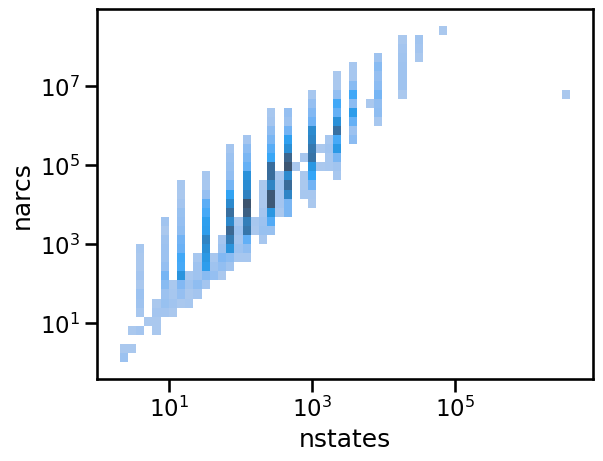

In [5]:
sns.histplot(data=dffsac, x="nstates", y="narcs", fill=True,log_scale=(10,10))

<Axes: >

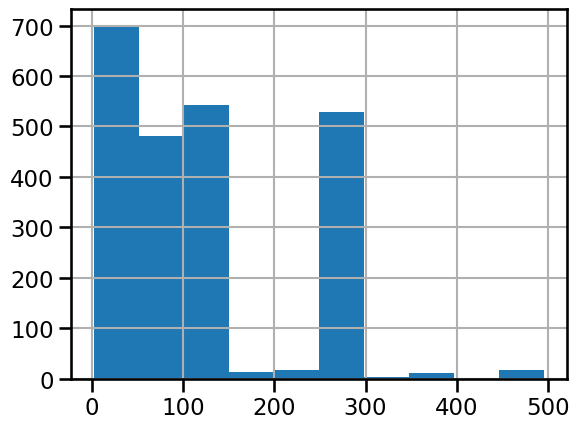

In [348]:
dffsac[dffsac['nstates']<500]['nstates'].hist()

In [384]:
dfbenchk2 = pd.read_csv("../results/fsadb_uw_k2_cpu_1_compbenchs.csv")
dfbenchk2 = dfbenchk2[~dfbenchk2['fileC'].duplicated()]
# dfbenchk2 = pd.read_csv("../results/fsadb_uw1_composed_k2_cpu1_compbenchs.csv")

dfbenchk2["name"]="k2"
dfbenchk2[["min","max","mean","std"]] = dfbenchk2[["min","max","mean","std"]]*1e9
print(len(dfbenchk2))

dfbenchk2cuda = pd.read_csv("../results/fsadb_uw_k2_cuda_8_compbenchs.csv")
# dfbenchk2cuda = pd.read_csv("../results/fsadb_uw1_composed_k2_cuda_compbenchs.csv")
dfbenchk2cuda["name"]="k2\ncuda"
dfbenchk2cuda[["min","max","mean","std"]] = dfbenchk2cuda[["min","max","mean","std"]]*1e9
print(len(dfbenchk2cuda))

991
667


In [385]:
def fn(x,s):
    x['name'] = s
    return x
dfbench = pd.concat([
#            fn(pd.read_csv("../results/fsadb_uw_TensorFSTs_onlycomp_compbenchs.csv")),
#            fn(pd.read_csv("../results/fsadb_uw_FiberTensorFSTs_compbenchs.csv"),'TensorFST'),
           fn(pd.read_csv("../results/fsadb_uw_FiberTensorFSTsReorient_compbenchs.csv"), 'TensorFST'),
           fn(pd.read_csv("../results/fsadb_uw_CuKron_compbenchs.csv"),'TensorFST\ncuda'),
    
#            pd.read_csv("../results/fsadb_uw_CooOfCooLod_compbenchs.csv"),
#            pd.read_csv("../results/fsadb_uw_CscOfCooLod_compbenchs.csv"),
           pd.read_csv("../results/fsadb_uw_OpenFst_compbenchs.csv") 
          ])
dfbench = pd.concat([dfbench, dfbenchk2, dfbenchk2cuda])

systems = ["OpenFst", "CooOfCooLod", "CscOfCooLod", "TensorFSTs"]

In [386]:
dfreal = dfbench[dfbench['fileC']=='data/real/ashravox.fst'].copy()

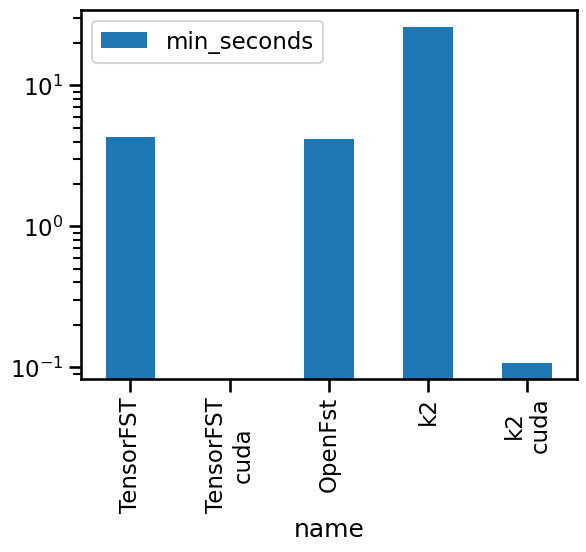

In [387]:
dfreal['min_seconds'] = dfreal['min']/1e9
dfreal.plot.bar(x='name',y='min_seconds')
plt.yscale('log')

In [388]:
# dfbench[dfbench['name'] == 'TensorFSTs_onlycomp']['equivalence'].value_counts()

In [389]:
dfbench[dfbench['fileC']=='data/real/ashravox.fst']

,fileA,fileB,fileC,min,max,mean,std,name,nstates,narcs,conn_nstates,conn_narcs,equivalence
0,data/real/ashrafsamplesent.noeps.fst,data/real/voxpopuli_ipatranscription.5.fst,data/real/ashravox.fst,4.280919e+09,6.807771e+09,5.060881e+09,1.125235e+09,TensorFST,6494136.0,13824162.0,NaN,NaN,NaN
0,data/real/ashrafsamplesent.noeps.fst,data/real/voxpopuli_ipatranscription.5.fst,data/real/ashravox.fst,-1.000000e+00,-1.000000e+00,-1.000000e+00,NaN,TensorFST\ncuda,NaN,NaN,NaN,NaN,NaN
0,data/real/ashrafsamplesent.noeps.fst,data/real/voxpopuli_ipatranscription.5.fst,data/real/ashravox.fst,4.146317e+09,4.146317e+09,4.146317e+09,NaN,OpenFst,4179150.0,7013817.0,NaN,NaN,NaN
0,data/real/ashrafsamplesent.noeps.fst,data/real/voxpopuli_ipatranscription.5.fst,data/real/ashravox.fst,2.621003e+10,2.688270e+10,2.654636e+10,3.363308e+08,k2,4257029.0,7121788.0,NaN,NaN,NaN
0,data/real/ashrafsamplesent.noeps.fst,data/real/voxpopuli_ipatranscription.5.fst,data/real/ashravox.fst,1.080027e+08,1.089810e+08,1.084918e+08,4.891410e+05,k2\ncuda,4257029.0,7121788.0,NaN,NaN,NaN


In [390]:
dfbench['specsA'] = dfbench['fileA'].map(parsefn)
dfbench['specsB'] = dfbench['fileB'].map(parsefn)
dfbench['minimum_time_seconds'] = dfbench['min']/1e9
dfbench['mean_time_seconds'] = dfbench['mean']/1e9
dfbench = dfbench.rename(columns = {'nstates':'nstatesC','narcs':'narcsC'})

In [391]:
dfs = []
for k,g in dfbench.groupby('fileC'):
    if len(g)>1 and 'OpenFst' in g['name'].tolist() and 'TensorFST' in g['name'].tolist():
#         display(g)
        g["time_rel_openfst"] =  (g[g["name"]=="OpenFst"]["minimum_time_seconds"]).values/g["minimum_time_seconds"]
        g["time_rel_tensorfst"] =  g["minimum_time_seconds"]/(g[g["name"]=="TensorFST"]["minimum_time_seconds"]).values
    #     g["time_rel_openfst"] =  g["mean_time_seconds"]/(g[g["name"]=="OpenFst"]["mean_time_seconds"]).values
        dfs.append(g)
dfs = pd.concat(dfs)
dfs = pd.concat([dfs,dfs['specsA'].apply(pd.Series).rename(columns={0:"nstatesA", 1:"narcsA", 2:"nsymsA", 3:"seedA"})],axis=1)
dfs = pd.concat([dfs,dfs['specsB'].apply(pd.Series).rename(columns={0:"nstatesB", 1:"narcsB", 2:"nsymsB", 3:"seedB"})],axis=1)

In [392]:
dfs["sparsityA"]=1-dfs["narcsA"]/(dfs['nstatesA']**2*dfs['nsymsA'])
dfs["lognarcsA"]=np.log10(dfs["narcsA"])
dfs["lognstatesA"]=np.log10(dfs["nstatesA"])
dfs["lognsymsA"]=np.log10(dfs["nsymsA"])
dfs["sparsityB"]=1-dfs["narcsB"]/(dfs['nstatesB']**2*dfs['nsymsB'])
dfs["lognarcsB"]=np.log10(dfs["narcsB"])
dfs["lognstatesB"]=np.log10(dfs["nstatesB"])
dfs["lognsymsB"]=np.log10(dfs["nsymsB"])
dfs["avgnsyms"]=(dfs["nsymsB"]+dfs["nsymsA"])/2
dfs["avgnstates"]=(dfs["nstatesB"]+dfs["nstatesA"])/2
dfs["avgnarcs"]=(dfs["narcsB"]+dfs["narcsA"])/2
dfs["avgsparsity"]=(dfs["sparsityA"]+dfs["sparsityB"])/2
# dfs = dfs[(dfs['avgnsyms']>8) & (dfs['avgnstates']>32)]

# minsyms = 16
# dfs = dfs[(dfs['nsymsB']>minsyms) & (dfs['nsymsA']>minsyms)]

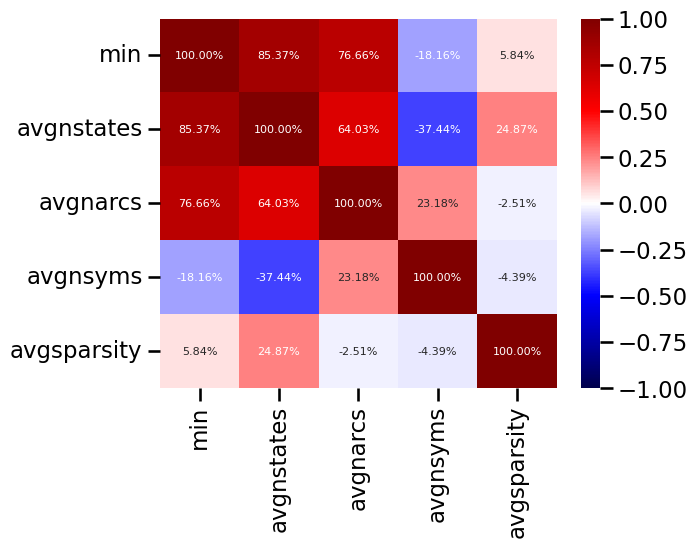

In [393]:
cc = dfs[dfs["name"]=="OpenFst"][['min','avgnstates', 'avgnarcs', 'avgnsyms',  'avgsparsity']].corr(method='spearman')
# plt.figure(figsize=(8,8))
heatmap = sns.heatmap(cc, vmin=-1, vmax=1, annot=True,  fmt=".2%",annot_kws={"size":8}, cmap='seismic')

In [394]:
# dfx = dfs[dfs["name"]=="OpenFst"]
# for c in ['avgnstates', 'avgnarcs', 'avgnsyms',  'avgsparsity']:
#     plt.figure()    
#     plt.scatter(dfx[c], dfx['min'],s=10)    
# plt.yscale('log')

/export/home/lium/priera/miniconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


(0.0, 1.0)

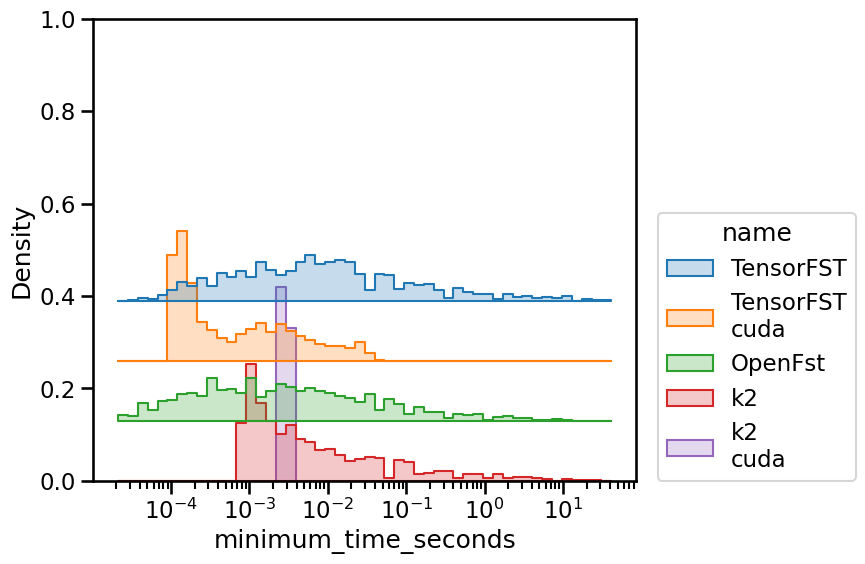

In [395]:
plt.figure(figsize=(7,6))
# plt.vlines(1,0,1, color='k',lw=1)
g = sns.histplot(data=dfs,bins=50, x="minimum_time_seconds", hue="name", element="step", stat="density", log_scale=True)
# plt.xlim(0.4,50);
# plt.xlabel("factor relative to OpenFst (<1 better)")
sns.move_legend(plt.gca(),loc=(1.04, 0 ), ncol=1)
ax = plt.gca()
for i,x in enumerate(ax.get_children()):
    if isinstance(x, matplotlib.collections.PolyCollection):
        x.set_offsets([0.0,(i-1)*60.0])
plt.ylim(0,1.0)

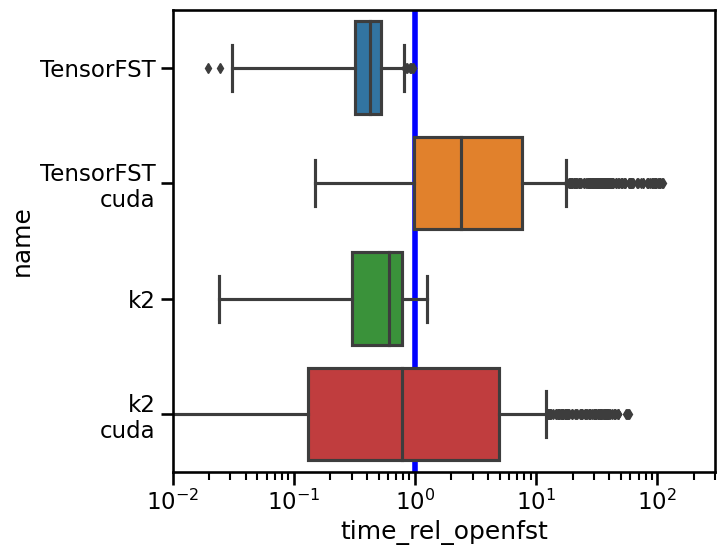

In [396]:
plt.figure(figsize=(7,6))
xlim = 1000

plt.vlines(1,-10,10, color='b',lw=4, zorder=-1)
g = sns.boxplot(data=dfs[(dfs["time_rel_openfst"]<xlim) & (dfs["name"]!="OpenFst")], 
                x="time_rel_openfst", y="name", orient='horizontal')
plt.xscale('log')
plt.xlim(0.01,300);

In [397]:
filecs = dfs[(dfs["min"]!=-1) & (dfs['name']=='TensorFST\ncuda')]['fileC'].unique()

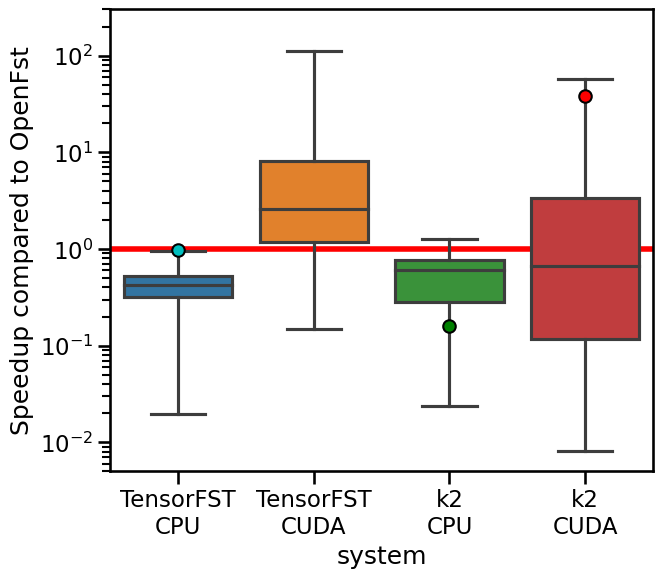

In [403]:
plt.figure(figsize=(7,6))
plt.hlines(1,-0.5,3.5, color='r',lw=4, zorder=-1)
xlim=10000
g = sns.boxplot(data=dfs[dfs['fileC'].isin(filecs) & (dfs["time_rel_openfst"]<xlim) & (dfs["name"]!="OpenFst")], 
                y="time_rel_openfst", x="name", orient='vertical',zorder=1,whis=50)


for i,n,c in [(0,'TensorFST', 'c'), (2,'k2', 'green'), (3,'k2\ncuda', 'red')]:
    plt.scatter(i, dfs[dfs['name'] == n].iloc[-1]['time_rel_openfst'], c=c, zorder=2, edgecolor='k')
plt.xticks([0,1,2,3],['TensorFST\nCPU','TensorFST\nCUDA','k2\nCPU','k2\nCUDA'])
plt.yscale('log')
plt.xlabel('system')
plt.ylabel('Speedup compared to OpenFst')
plt.ylim(0.005,300);

/export/home/lium/priera/miniconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


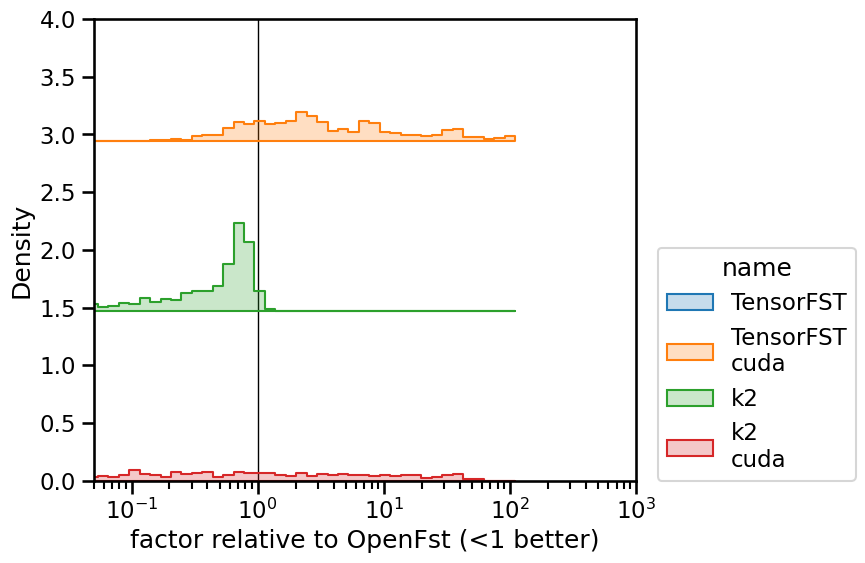

In [399]:
plt.figure(figsize=(7,6))
plt.vlines(1,0,4, color='k',lw=1, zorder=-1)
xlim = 1000
g = sns.histplot(data=dfs[(dfs["time_rel_openfst"]<xlim) & (dfs["name"]!="OpenFst")],bins=50, 
                 x="time_rel_openfst", hue="name",  element="step", stat="density", log_scale=True)
plt.xlim(0.05,xlim);
plt.xlabel("factor relative to OpenFst (<1 better)")
sns.move_legend(plt.gca(),loc=(1.04, 0 ), ncol=1)
ax = plt.gca()
plt.ylim(0,4)
for i,x in enumerate(ax.get_children()):
    if isinstance(x, matplotlib.collections.PolyCollection):
        x.set_offsets([0.0,(i-1)*170.0])

/export/home/lium/priera/miniconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


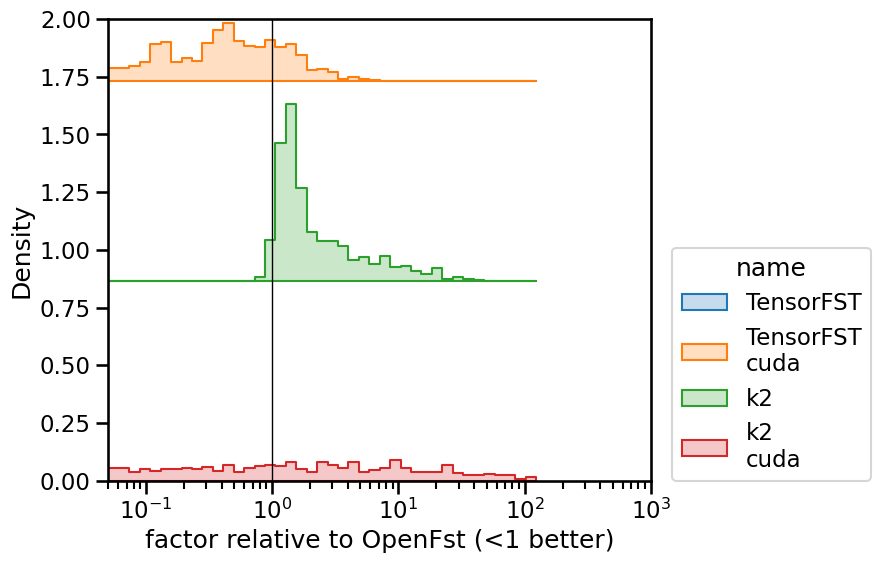

In [339]:
plt.figure(figsize=(7,6))
plt.vlines(1,0,2, color='k',lw=1)
xlim = 1000
g = sns.histplot(data=dfs[(dfs["time_rel_openfst"]<xlim) & (dfs["name"]!="OpenFst")],bins=50, 
                 x="time_rel_openfst", hue="name",  element="step", stat="density", log_scale=True)
plt.xlim(0.05,xlim);
plt.xlabel("factor relative to OpenFst (<1 better)")
sns.move_legend(plt.gca(),loc=(1.04, 0 ), ncol=1)
ax = plt.gca()
plt.ylim(0,2)
for i,x in enumerate(ax.get_children()):
    if isinstance(x, matplotlib.collections.PolyCollection):
        x.set_offsets([0.0,(i-1)*200.0])

In [ ]:
plt.figure(figsize=(7,6))
plt.vlines(1,0,2, color='k',lw=1)
xlim = 1000
g = sns.histplot(data=dfs[(dfs["time_rel_tensorfst"]<xlim) & (dfs["name"]!="TensorFSTs_onlycomp")],bins=50, 
                 x="time_rel_tensorfst", hue="name",  element="step", stat="density", log_scale=True)
plt.xlim(0.05,xlim);
plt.xlabel("factor relative to OpenFst (<1 better)")
sns.move_legend(plt.gca(),loc=(1.04, 0 ), ncol=1)
ax = plt.gca()
plt.ylim(0,1.5)
for i,x in enumerate(ax.get_children()):
    if isinstance(x, matplotlib.collections.PolyCollection):
        x.set_offsets([0.0,(i-1)*50.0])

In [189]:
# np.vstack([
#     dfs[dfs["name"]=="TensorFSTs"].sort_values('time_rel_openfst').iloc[-4:][['fileA','fileB','fileC']].values,
#     dfs[dfs["name"]=="CooOfCoo"].sort_values('time_rel_openfst').iloc[-4:][['fileA','fileB','fileC']].values
# ])

In [190]:
# dfs[dfs['time_rel_openfst']<1].value_counts(['nsymsA','nsymsB', 'nstatesA', 'nstatesB', 'narcsA', 'narcsB'])

In [299]:
dfy = pd.pivot_table(dfs, "time_rel_openfst", "fileC", "name")
dfy = pd.concat([dfy, dfs[dfs["name"]=="OpenFst"].set_index("fileC")],axis=1)

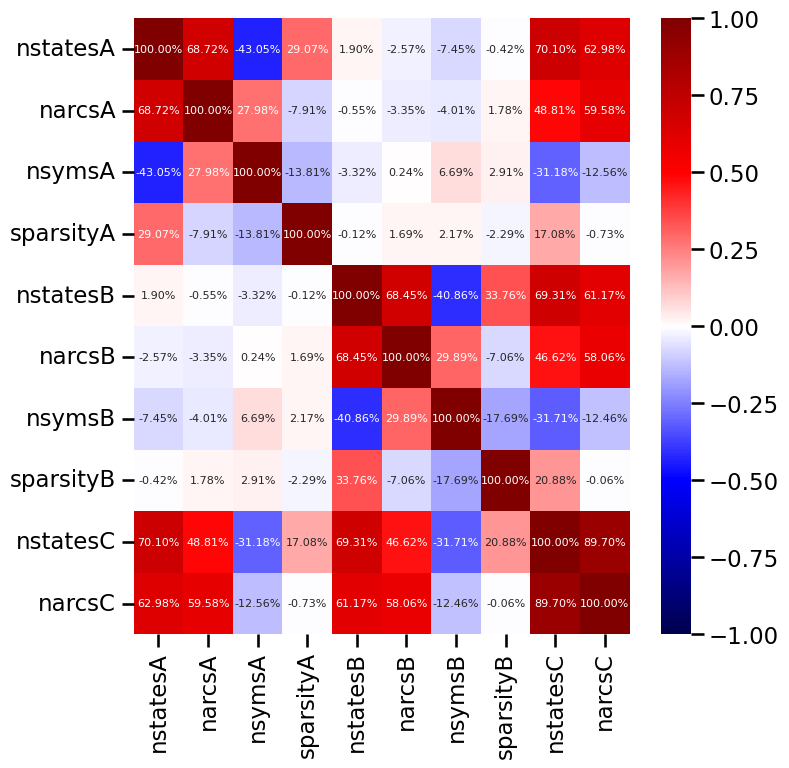

In [300]:
cc = dfy[['nstatesA', 'narcsA', 'nsymsA',  'sparsityA', 'nstatesB', 'narcsB', 'nsymsB', 'sparsityB', 'nstatesC', 'narcsC']].corr(method='spearman')
plt.figure(figsize=(8,8))
heatmap = sns.heatmap(cc, vmin=-1, vmax=1, annot=True,  fmt=".2%",annot_kws={"size":8}, cmap='seismic')

In [301]:
# cc = dfy[['CooOfCoo', 'TensorFSTs','k2', 'nstatesA', 'narcsA', 'nsymsA', 'seedA', 'nstatesB',
#        'narcsB', 'nsymsB', 'seedB', 'sparsityA', 'lognarcsA', 'lognstatesA',
#        'lognsymsA', 'sparsityB', 'lognarcsB', 'lognstatesB', 'lognsymsB' ]].corr()

# display(cc[['CooOfCoo', 'TensorFSTs','k2']].loc[['nstatesA', 'narcsA', 'nsymsA']])

# display(cc[['CooOfCoo', 'TensorFSTs','k2']].loc[['lognstatesA', 'lognarcsA', 'lognsymsA']])

# display(cc[['CooOfCoo', 'TensorFSTs','k2']].loc[['lognstatesA', 'lognarcsA', 'nsymsA']])

In [302]:
# cc = dfy[systems+['nstatesA', 'narcsA', 'nsymsA', 'seedA', 'nstatesB',
#        'narcsB', 'nsymsB', 'seedB', 'sparsityA', 'lognarcsA', 'lognstatesA',
#        'lognsymsA', 'sparsityB', 'lognarcsB', 'lognstatesB', 'lognsymsB', 'nstatesC', 'narcsC']].corr(method='spearman')

# cols = ['nstatesA', 'narcsA', 'nsymsA', 'nstatesB','narcsB', 'nsymsB', 'nstatesC', 'narcsC']

# display(cc[systems].loc[cols])
# print(cc[['CooOfCoo', 'TensorFSTs','k2']].loc[cols].to_latex(escape=False,float_format="%.2f",))
# print(cc[systems].loc[cols].to_html(float_format="%.2f"))

In [303]:
# plot(dfy, "TensorFSTs_onlycomp", "k2", "nsymsB")

In [304]:
# plot(dfy, "CooOfDictLod", "CooOfCooLod", "avgnsyms")

In [305]:
# plot(dfy, "CooOfCooLod", "CscOfCooLod", "avgnsyms")

In [306]:
# plot(dfy, "CooOfCooLod", "CooOfCooMTLod", "avgnsyms")

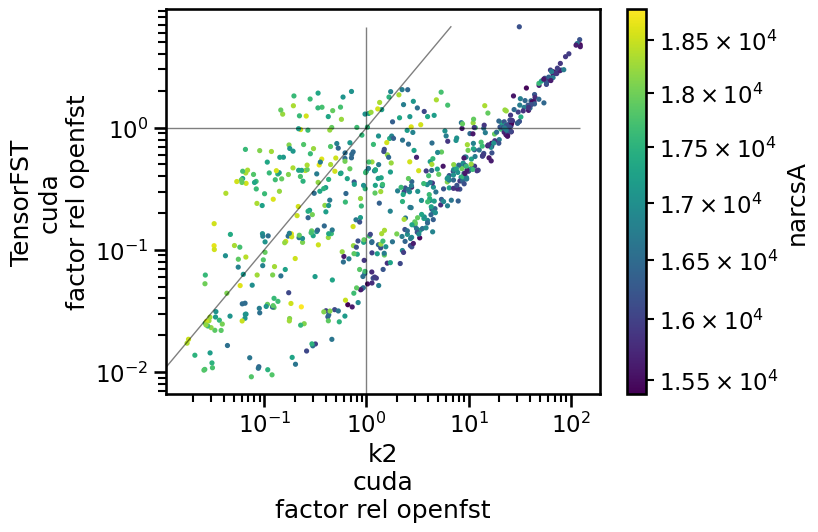

In [307]:
plot(dfy, "TensorFST\ncuda", "k2\ncuda", "narcsA")

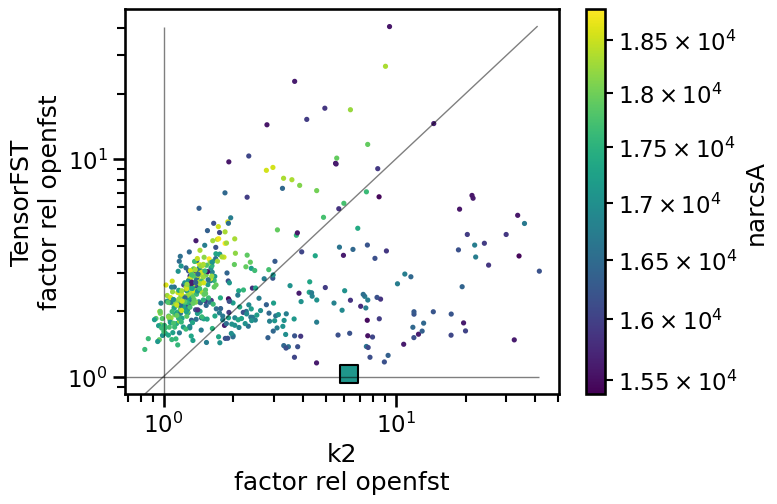

In [296]:
plot(dfy, "TensorFST", "k2", "narcsA")

In [203]:
# plot(dfy, "TensorFSTs_onlycomp", "k2", "nsymsB")

In [205]:
# plot(dfy, "TensorFSTs", "k2", "avgnstates")

In [206]:
# plot(dfy, "TensorFSTs", "k2", "avgnarcs")

In [207]:
# plot(dfy, "TensorFSTs", "k2", "avgnsyms")

In [208]:
# plot(dfy, "k2", "CooOfCooLod", "avgnarcs")

In [209]:
# plot(dfy, "k2", "CooOfCooLod", "avgnstates")

In [210]:
# plot(dfy, "TensorFSTs", "CooOfCooLod", "avgnsyms")

In [211]:
# plot(dfy, "TensorFSTs", "CooOfCooLod", "avgnarcs")

In [212]:
# plot(dfy, "TensorFSTs", "CooOfCooLod", "avgnstates")

In [213]:
# plot(dfy, "TensorFSTs", "CooOfCooLod", "nstatesC")

In [214]:
# plot(dfy, "TensorFSTs", "CooOfCooLod", "nstatesA")

In [215]:
# plot(dfy, "TensorFSTs", "CooOfCooLod", "nstatesB")

In [216]:
# plot(dfy, "CooOfCooSod", "CooOfCooLod", "avgnstates")

In [217]:
# plot(dfy, "CooOfCooSod", "CooOfCooLod", "avgnsyms")

In [219]:
# plot(dfy, "k2cuda", "CooOfCooLod", "avgnsyms")

In [223]:
# dfx = dfs[(dfs['name']=='TensorFSTs_onlycomp')]
# plt.scatter( dfx["nstatesC"], dfx["narcsC"], c=dfx['time_rel_openfst'], s=10, alpha=0.4)
# plt.xscale('log')
# plt.yscale('log')
# plt.xlim(1,20e3)
# plt.colorbar();

In [165]:
dfy = pd.pivot_table(dfs, "minimum_time_seconds", "fileC", "name")
dfy = pd.concat([dfy, dfs[dfs["name"]=="OpenFst"].set_index("fileC")],axis=1)
# dfy = dfy[dfy['seedA']>1000]

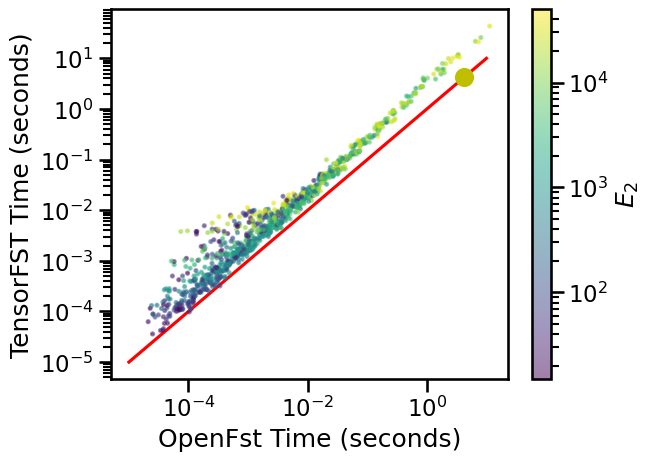

In [168]:
plt.plot([1e-5,1e1],np.array([1e-5,1e1]),'r', zorder=-1)
plt.scatter(dfy["OpenFst"].iloc[-1:], dfy["TensorFST"].iloc[-1:], c =['y'], s=150, marker='o',zorder=2)

plt.scatter(dfy["OpenFst"], dfy["TensorFST"], s=5, alpha=0.5, c = dfy['narcsB'],  norm=LogNorm())

plt.xscale('log')
plt.yscale('log')
plt.colorbar(label='$E_2$')
plt.xlabel('OpenFst Time (seconds)')
plt.ylabel('TensorFST Time (seconds)');

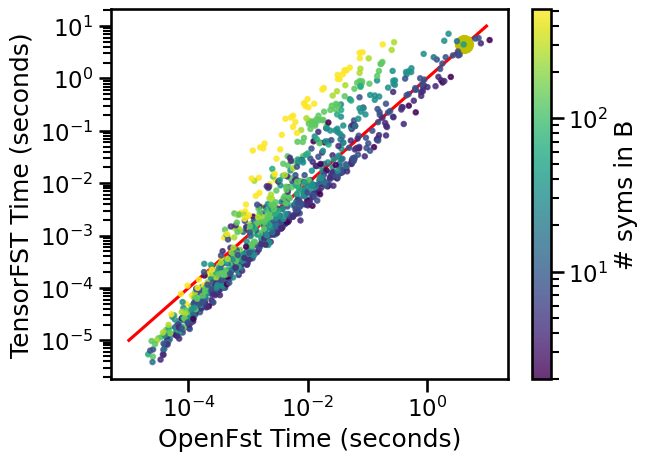

In [112]:
plt.plot([1e-5,1e1],np.array([1e-5,1e1]),'r', zorder=-1)
plt.scatter(dfy["OpenFst"].iloc[-1:], dfy["TensorFSTs_onlycomp"].iloc[-1:], c =['y'], s=150, marker='o')

plt.scatter( dfy["OpenFst"], dfy["TensorFSTs_onlycomp"], s=10, alpha=0.8, c = dfy['nsymsB'],  norm=LogNorm())

plt.xscale('log')
plt.yscale('log')
plt.colorbar(label='# syms in B')
plt.xlabel('OpenFst Time (seconds)')
plt.ylabel('TensorFST Time (seconds)');

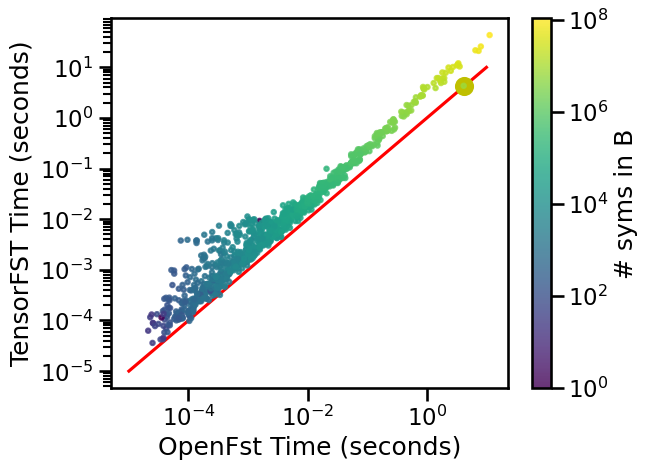

In [133]:
plt.plot([1e-5,1e1],np.array([1e-5,1e1]),'r', zorder=-1)
plt.scatter(dfy["OpenFst"].iloc[-1:], dfy["TensorFST"].iloc[-1:], c =['y'], s=150, marker='o')

plt.scatter( dfy["OpenFst"], dfy["TensorFST"], s=10, alpha=0.8, c = dfy['narcsC'],  norm=LogNorm())

plt.xscale('log')
plt.yscale('log')
plt.colorbar(label='# syms in B')
plt.xlabel('OpenFst Time (seconds)')
plt.ylabel('TensorFST Time (seconds)');

fileC
data/fsadb_uw_composed/0005_1823.fst    4486
data/fsadb_uw_composed/0012_2255.fst    4470
data/fsadb_uw_composed/0014_1404.fst    3660
data/fsadb_uw_composed/0015_1570.fst    3752
data/fsadb_uw_composed/0022_0408.fst    1301
                                        ... 
data/fsadb_uw_composed/2333_1169.fst      15
data/fsadb_uw_composed/2335_0919.fst      15
data/fsadb_uw_composed/2345_0610.fst      15
data/fsadb_uw_composed/2346_1390.fst      15
data/real/ashravox.fst                     0
Name: seedA, Length: 999, dtype: int64

/tmp/ipykernel_378062/280234916.py:35: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


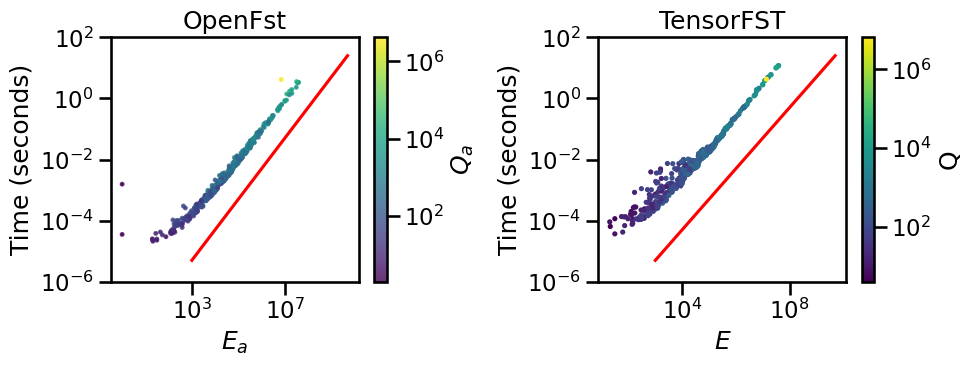

In [227]:
dfx = dfs[dfs['name']=='OpenFst']
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)

c = np.corrcoef(dfx['minimum_time_seconds'],dfx['narcsC'])[0,1]
plt.title(f"OpenFst")
plt.scatter(dfx['narcsC'] , dfx['minimum_time_seconds'],s=4,c=dfx['nstatesC'], alpha=0.8, norm=LogNorm())
plt.colorbar(label='$Q_a$');
plt.yscale('log')
plt.xscale('log')

plt.plot([1e3,5e9],0.5e-8*np.array([1e3,5e9]),'r')
plt.ylabel('Time (seconds)')
plt.xlabel('$E_a$');
plt.ylim(1e-6,1e2)

plt.subplot(1,2,2)

dfx = dfs[dfs['name']=='TensorFST']

plt.tight_layout()
x = dfx['narcsC']
c = np.corrcoef(dfx['minimum_time_seconds'],x)[0,1]
plt.title(f"TensorFST")
plt.scatter(x, dfx['minimum_time_seconds'], s=5, c=dfx['nstatesC'], norm=LogNorm())
plt.colorbar(label='Q')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Time (seconds)')
plt.xlabel('$E$');
plt.plot([1e3,5e9],0.5e-8*np.array([1e3,5e9]),'r')
plt.ylim(1e-6,1e2)

plt.tight_layout()

/tmp/ipykernel_378062/16290543.py:34: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


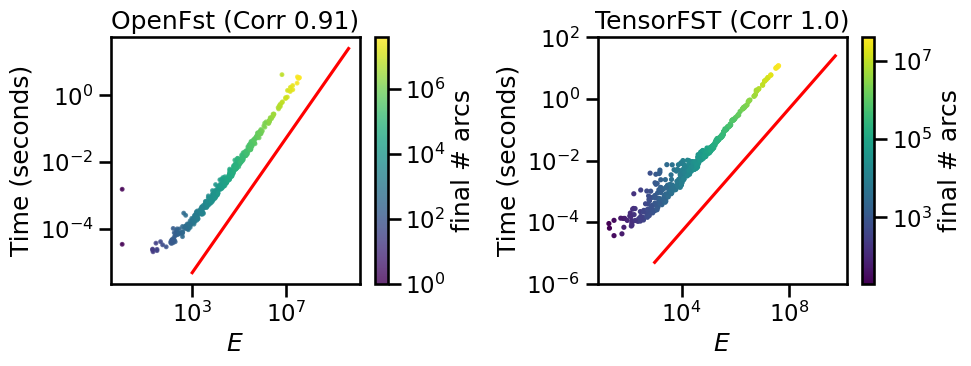

In [224]:
dfx = dfs[dfs['name']=='OpenFst']
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)

c = np.corrcoef(dfx['minimum_time_seconds'],dfx['narcsC'])[0,1]
plt.title(f"OpenFst (Corr {c:0.2})")
plt.scatter(dfx['narcsC'] , dfx['minimum_time_seconds'],s=4,c=dfx['narcsC'], alpha=0.8, norm=LogNorm())
plt.colorbar(label='final # arcs');
plt.yscale('log')
plt.xscale('log')

plt.plot([1e3,5e9],0.5e-8*np.array([1e3,5e9]),'r')
plt.ylabel('Time (seconds)')
plt.xlabel('$E$');

plt.subplot(1,2,2)

dfx = dfs[dfs['name']=='TensorFST']

plt.tight_layout()

c = np.corrcoef(dfx['minimum_time_seconds'],dfx['narcsC'])[0,1]
plt.title(f"TensorFST (Corr {c:0.2})")
plt.scatter(dfx['narcsC'] , dfx['minimum_time_seconds'] , s=5, c=dfx['narcsC'], norm=LogNorm())
plt.colorbar(label='final # arcs')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Time (seconds)')
plt.xlabel('$E$');
plt.plot([1e3,5e9],0.5e-8*np.array([1e3,5e9]),'r')
plt.ylim(1e-6,1e2)

plt.tight_layout()

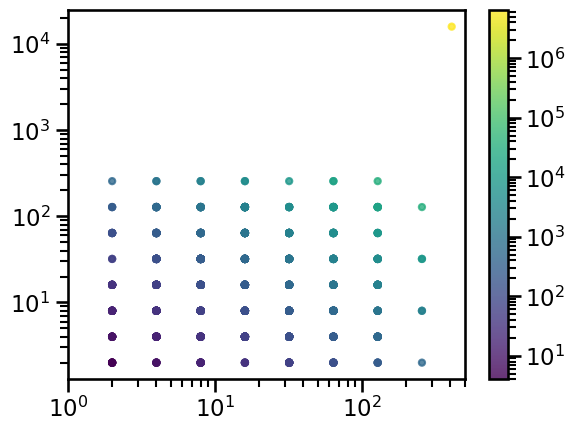

In [24]:
dfx = dfs[dfs['name']=='TensorFSTs_onlycomp']
plt.scatter( dfx["nstatesA"], dfx["nstatesB"], c=dfx['nstatesC'], s=20, alpha=0.8, norm=LogNorm())
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,0.5e3)
plt.colorbar()

In [252]:
min(np.load('../results/realexample_times_FiberTensorFSTs.npy'))/1e9

4.323903327